# Top-level simple experiment with the new version of echo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from echo import esn

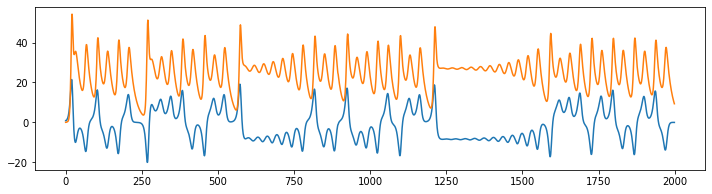

In [2]:
data = esn.Data.create_source('lorenz')
x,y = data.generate(2000, sampling_step=0.02, seed=0)
plt.figure(figsize=(12,3))
plt.plot(x);
plt.plot(y);

Reservoir of 50 nodes, `ws` type.


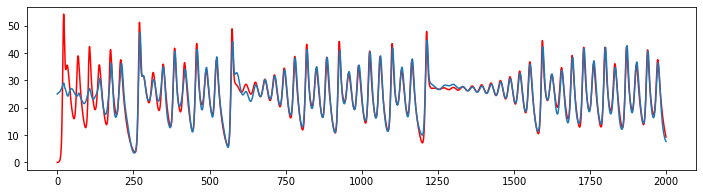

In [3]:
model = esn.Reservoir(50)
print(model)
model.fit(x, y)
# plt.plot(w);

z = model.predict(x)
plt.figure(figsize=(12,3))
plt.plot(y, 'red')
plt.plot(z);